In [47]:
from visualize_data import Visualizer
import os
import sys
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

root_frames_dir = "/Users/jost/Jost/Code/2024-nc-hackathon-spades/frames"
model_path = "/Users/jost/Jost/Code/2024-nc-hackathon-spades/DataVisualization/models/latest_model_3231.keras"
K_path = "/Users/jost/Jost/Code/2024-nc-hackathon-spades/DataVisualization/camera.json"
dest_dir = "/Users/jost/Jost/Code/2024-nc-hackathon-spades/visualizations"

visualizer = Visualizer(root_frames_dir, model_path, K_path, dest_dir)

def calcalate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

memo = []
#take random files in that dir
for filename in os.listdir(os.path.join(root_frames_dir, "seq_RT002")):
    if filename.endswith(".png"):
        if visualizer.create_graphic(filename) is not None:
            q_lable, r_label, q_pred, r_pred = visualizer.create_graphic(filename)
        memo.append((q_lable, r_label, q_pred, r_pred))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 120, 120, 22)      594       
                                                                 
 conv1_bn (BatchNormalizati  (None, 120, 120, 22)      88        
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 120, 120, 22)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 120, 120, 22)      198       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 120, 120, 22)      88    

In [50]:
#create csv file from data
with open("comparison.csv", "w") as f:
    f.write("id, mse_pos, mae_pos, mape_pos, mse_q, mae_q, mape_q\n")
    id = 0
    
    for q_label, r_label, q_pred, r_pred in memo:
        mse_pos = mean_squared_error(r_label[:3], r_pred[:3])
        mae_pos = mean_absolute_error(r_label[:3], r_pred[:3])
        mape_pos = calcalate_mape(r_label[:3], r_pred[:3])
        mse_q = mean_squared_error(q_label, q_pred)
        mae_q = mean_absolute_error(q_label, q_pred)
        mape_q = calcalate_mape(q_label, q_pred)
        
        f.write(f"{id}, {mse_pos}, {mae_pos}, {mape_pos}, {mse_q}, {mae_q}, {mape_q}\n")
        id += 1

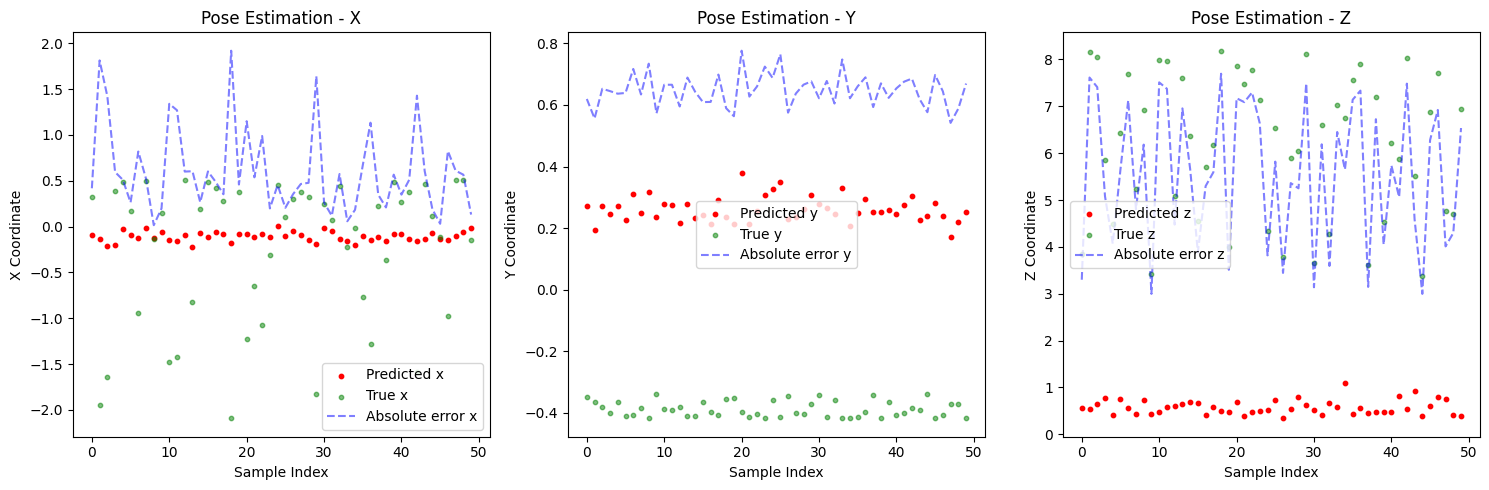

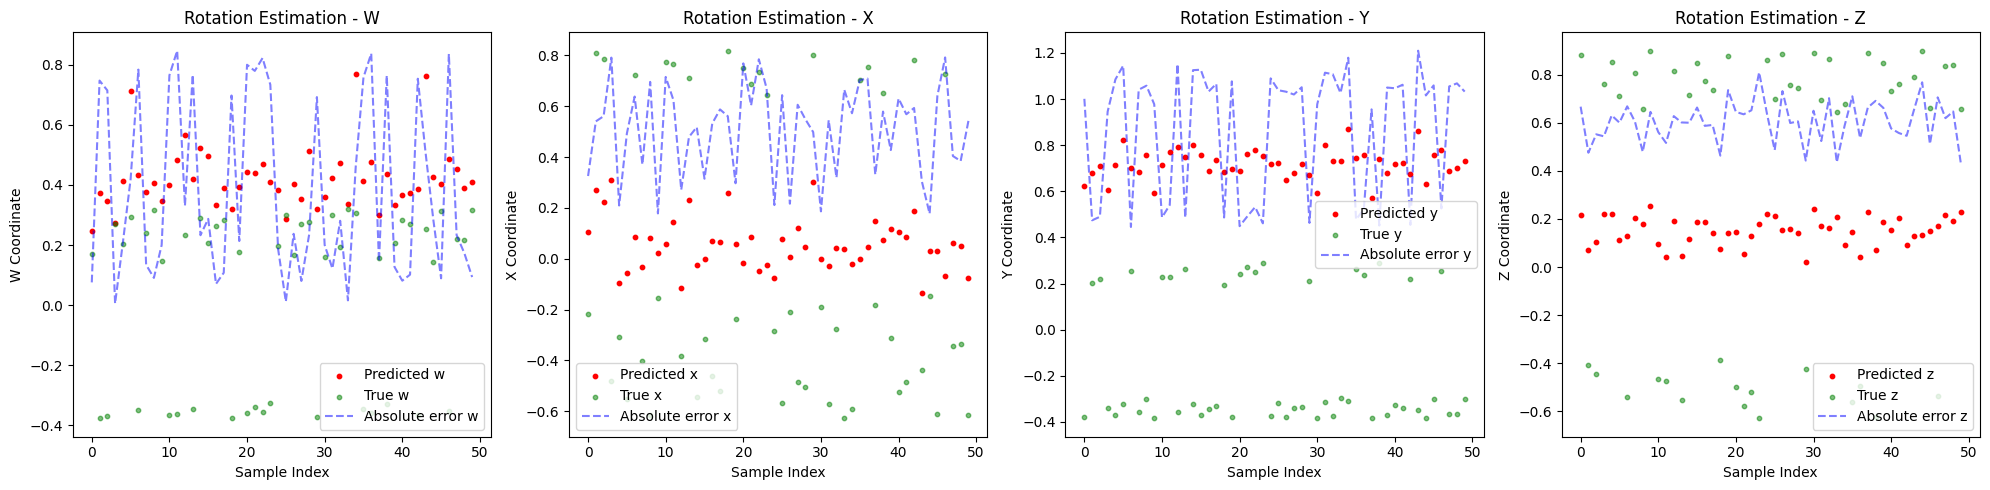

In [51]:
import matplotlib.pyplot as plt

pred_pose = np.array([r_pred[:3] for q_label, r_label, q_pred, r_pred in memo])
true_pose = np.array([r_label[:3] for q_label, r_label, q_pred, r_pred in memo])

pred_rotation = np.array([q_pred for q_label, r_label, q_pred, r_pred in memo])
true_rotation = np.array([q_label for q_label, r_label, q_pred, r_pred in memo])



def plot_pose(pred_pose, true_pose):
    counter = 50
    pred_pose = pred_pose[:counter]
    true_pose = true_pose[:counter]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axis_labels = ['x', 'y', 'z']

    for i, ax in enumerate(axes):
        ax.scatter(range(len(pred_pose)), pred_pose[:, i], label=f'Predicted {axis_labels[i]}', s=10, c='r')
        ax.scatter(range(len(true_pose)), true_pose[:, i], label=f'True {axis_labels[i]}', s=10, alpha=0.5, c='g')
        ax.plot(np.abs(pred_pose[:, i] - true_pose[:, i]), c='b', alpha=0.5, linestyle='--', label=f'Absolute error {axis_labels[i]}')
        ax.set_title(f'Pose Estimation - {axis_labels[i].upper()}')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel(f'{axis_labels[i].upper()} Coordinate')
        ax.legend()

    plt.tight_layout()
    plt.show()

def plot_rotation(pred_rotation, true_rotation):
    counter = 50
    pred_rotation = pred_rotation[:counter]
    true_rotation = true_rotation[:counter]

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axis_labels = ['w', 'x', 'y', 'z']

    for i, ax in enumerate(axes):
        ax.scatter(range(len(pred_rotation)), pred_rotation[:, i], label=f'Predicted {axis_labels[i]}', s=10, c='r')
        ax.scatter(range(len(true_rotation)), true_rotation[:, i], label=f'True {axis_labels[i]}', s=10, alpha=0.5, c='g')
        ax.plot(np.abs(pred_rotation[:, i] - true_rotation[:, i]), c='b', alpha=0.5, linestyle='--', label=f'Absolute error {axis_labels[i]}')
        ax.set_title(f'Rotation Estimation - {axis_labels[i].upper()}')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel(f'{axis_labels[i].upper()} Coordinate')
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_pose(pred_pose, true_pose)
plot_rotation(pred_rotation, true_rotation)